In [51]:
import os
import tarfile
import re
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
path_ds = '/nobackup/users/schreurs/project_GAN/dataset'

In [4]:
files = [f for f in os.listdir(path_ds) if os.path.isfile(os.path.join(path_ds, f))]
print("Number of days in dataset = ", len(files))

Number of days in dataset =  772


In [5]:
files[0]

'RAD25_OPER_R___TARRRE__L2__20190826T080500_20190827T080000_0001.tar'

# Unpack the tar files
The download dataset consists of 772 days each packed in a tar file. With the code below the tar files are unpacked into folders with the same name

In [14]:
# Testing path
tar_path = path_ds + '/' + files[0]
print("tar path: ", tar_path)
unpack_folder = tar_path.replace('.tar','')
print("unpack in folder: ", unpack_folder)

tar path:  /nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190826T080500_20190827T080000_0001.tar
unpack in folder:  /nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190826T080500_20190827T080000_0001


In [16]:
for file in files:
    tar_path = path_ds + '/' + file
    unpack_folder = tar_path.replace('.tar', '')
    
    tar_file = tarfile.open(tar_path)
    tar_file.extractall(unpack_folder) 
    tar_file.close()

# Open folders

Now create a dataset from the image data.

In [ ]:
folders = [f for f in os.listdir(path_ds) if os.path.isdir(os.path.join(path_ds, f))]

In [26]:
radar_dir = path_ds + '/' + folders[0]
radar_dir

'/nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190316T080500_20190317T080000_0001'

Test on data of 1 day (folder) and 1 timestamp (file)

In [74]:
i = 5
radar_dir = path_ds  + '/' + folders[i]
print(radar_dir)
onlyfiles = [f for f in os.listdir(radar_dir) if os.path.isfile(os.path.join(radar_dir, f))]


/nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190103T080500_20190104T080000_0001


In [65]:
print(onlyfiles[0])
# Regex pattern to extract timestamp from filename
regex_p = re.compile('(\d{12})\.h5')
regex_p.findall(onlyfiles[0])[0]

RAD_NL25_RAC_RE_201903170800.h5


'201903170800'

In [70]:
h5f = h5py.File(radar_dir+'/'+onlyfiles[0], 'r')
radar_img = np.array(h5f['image1']['image_data'])
img_mask = np.array(h5f['image2']['image_data'])
print("Uniques values in radar: ", len(np.unique(radar_img)))
print("Unique values in mask: ", len(np.unique(img_mask)))

Uniques values in radar:  876
Unique values in mask:  17068


Apparently the mask can have than two different values. So let's look at the images

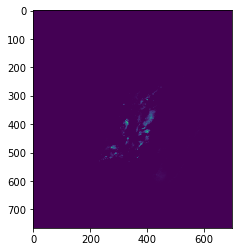

In [73]:
# Set the masked pixel to 0 so that difference between pixel values can be better seen
radar_img[radar_img==65535] = 0
plt.imshow(radar_img)
plt.show()

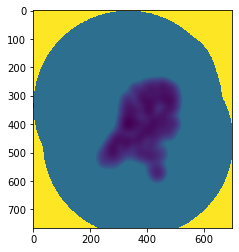

In [72]:
plt.imshow(img_mask)
plt.show()